In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder



## Loading Excel Data into Pandas DataFrame

In [3]:
location = pd.read_excel("./Location Table.xlsx")
uber_trip = pd.read_excel('./Uber_Trip_Details.xlsx')


## Covert Date Time Column

In [4]:
uber_trip['Pickup Time'] = pd.to_datetime(uber_trip['Pickup Time'])
uber_trip['Drop Off Time'] = pd.to_datetime(uber_trip['Drop Off Time'])

## Merge Location names

In [5]:
location = location.rename(columns={'LocationID': 'PULocationID', 'Location': 'PU_Location', 'City': 'PU_City'})
uber_trip = pd.merge(uber_trip, location[['PULocationID', 'PU_Location', 'PU_City']], on='PULocationID', how='left')

location = location.rename(columns={'PULocationID': 'DOLocationID', 'PU_Location': 'DO_Location', 'PU_City': 'DO_City'})
uber_trip = uber_trip.merge(location,on='DOLocationID', how='left')

In [6]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan


In [7]:
location.head()

,DOLocationID,DO_Location,DO_City
0,1,Newark Airport,"Newark, New Jersey"
1,2,Jamaica Bay,Queens
2,3,Allerton/Pelham Gardens,The Bronx
3,4,Alphabet City,Manhattan
4,5,Arden Heights,Staten Island


In [8]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan


## Check the Number of Rows and Columns in the DataFrame

In [9]:
# location.shape
uber_trip.shape


(103728, 17)

## Displaying Summary Information of the DataFrame

In [10]:
# location.info()
uber_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103728 entries, 0 to 103727
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           103728 non-null  int64         
 1   Pickup Time       103728 non-null  datetime64[ns]
 2   Drop Off Time     103728 non-null  datetime64[ns]
 3   passenger_count   103728 non-null  int64         
 4   trip_distance     103728 non-null  float64       
 5   PULocationID      103728 non-null  int64         
 6   DOLocationID      103728 non-null  int64         
 7   fare_amount       103728 non-null  float64       
 8   Surge Fee         103728 non-null  float64       
 9   Vehicle           103728 non-null  object        
 10  Payment_type      103728 non-null  object        
 11  Pickup_Time_Hour  103728 non-null  object        
 12  Drop_TIme         103728 non-null  object        
 13  PU_Location       103702 non-null  object        
 14  PU_C

## Displaying Summary Statistic of the Uber Trip Data Frame

In [11]:
uber_trip[['fare_amount','Surge Fee','trip_distance']].describe()

,fare_amount,Surge Fee,trip_distance
count,103728.000000,103728.000000,103728.000000
mean,12.998337,1.979999,3.363931
std,9.078582,2.421460,3.192828
min,2.500000,0.000000,1.010000
25%,7.500000,0.000000,1.530000
50%,10.000000,1.960000,2.280000
75%,14.500000,3.000000,3.800000
max,563.790000,117.930000,144.100000


## Check Empty/Null Values in the Data Frame

In [12]:
# location.isnull().sum()
uber_trip.isnull().sum()

Trip ID               0
Pickup Time           0
Drop Off Time         0
passenger_count       0
trip_distance         0
PULocationID          0
DOLocationID          0
fare_amount           0
Surge Fee             0
Vehicle               0
Payment_type          0
Pickup_Time_Hour      0
Drop_TIme             0
PU_Location          26
PU_City             926
DO_Location         155
DO_City             684
dtype: int64

## Calculate Trip Duration in minutes

In [13]:
uber_trip['Trip Duration (min)'] = (uber_trip['Drop Off Time'] - uber_trip['Pickup Time']).dt.total_seconds() / 60

In [14]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City,Trip Duration (min)
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens,21.716667
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan,6.883333
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan,13.466667
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn,9.433333
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan,7.000000


# Business Performance Metrics Analysis with Python

### 1.Average Trip Time

In [15]:
print(f" Average Trip Time - {round((uber_trip['Drop Off Time'] - uber_trip['Pickup Time']).mean().total_seconds() / 60)} minutes")

 Average Trip Time - 16 minutes


### 2. Total Booking

In [16]:
print(f" Total Booking =  {round(uber_trip['Trip ID'].count()/1000,1)}K")

 Total Booking =  103.7K


### 3.Total Booking Value

In [17]:
print(f"Total Booking Amount = ${round(((uber_trip['fare_amount'] + uber_trip['Surge Fee']).sum())/1_000_000,1)}M ")

Total Booking Amount = $1.6M 


### 4. Avg Booking Value

In [18]:
print(f"Average Booking Value - ${round((uber_trip['fare_amount'] + uber_trip['Surge Fee']).mean(),1)}")

Average Booking Value - $15.0


### 5.Total Trip Distance

In [19]:
print(f"Total Trip Distance {round(uber_trip['trip_distance'].sum()/1000,1)}K miles")

Total Trip Distance 348.9K miles


# Plotting settings

In [20]:
sns.set(style="whitegrid")

### 1. Top 10 Pickup Locations

C:\Users\moham\AppData\Local\Temp\ipykernel_21296\3390026358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_pickups.index, x=top_pickups.values, palette="Blues_d")


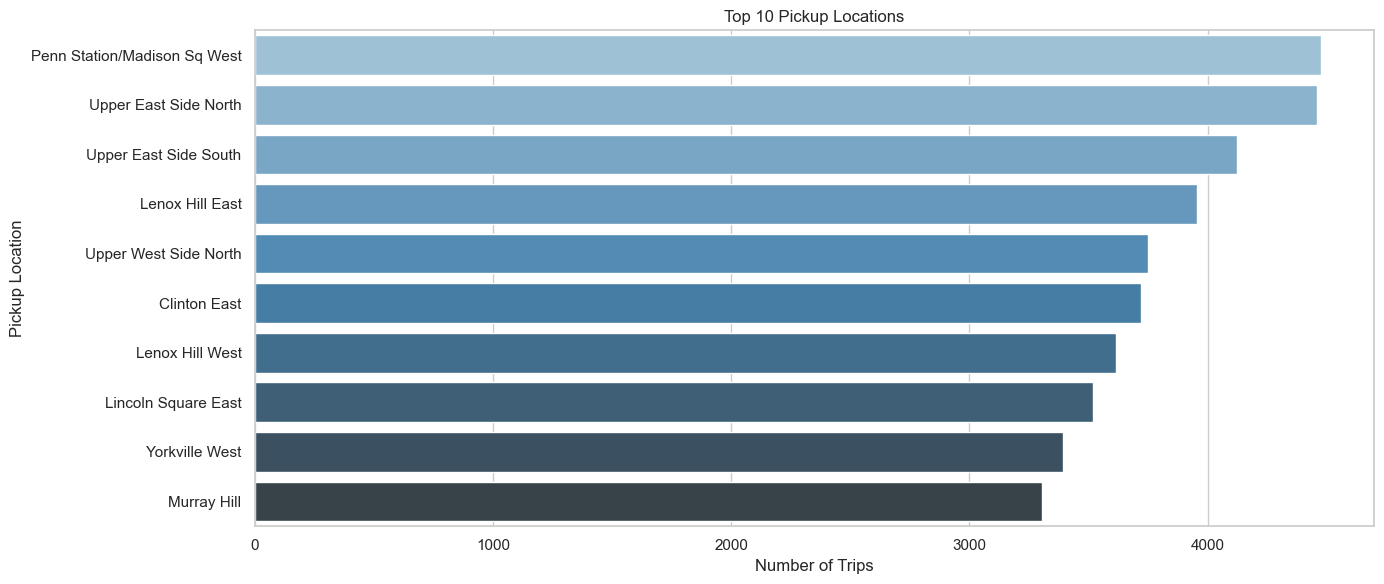

In [21]:
plt.figure(figsize=(14, 6))
top_pickups = uber_trip['PU_Location'].value_counts().head(10)
sns.barplot(y=top_pickups.index, x=top_pickups.values, palette="Blues_d")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Location")
plt.tight_layout()
plt.show()

## 2. Top 10 Drop-off Locations

C:\Users\moham\AppData\Local\Temp\ipykernel_21296\1224079405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_dropoffs.index, x=top_dropoffs.values, palette="Greens_d")


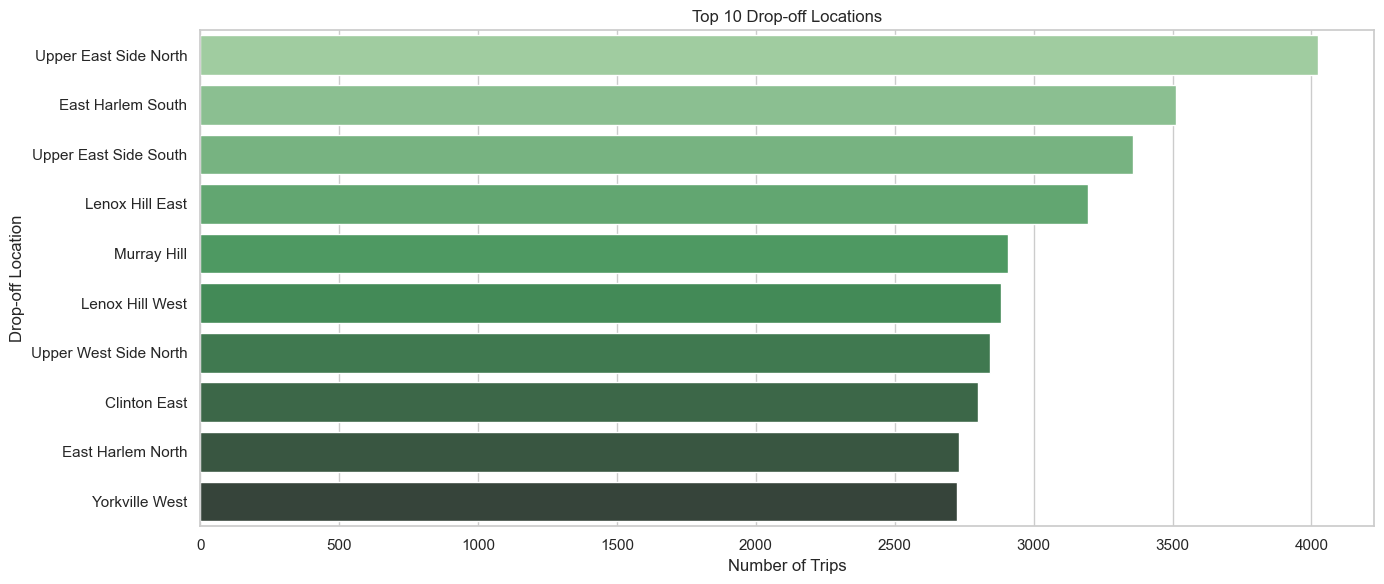

In [22]:
# 2. Top 10 Drop-off Locations
plt.figure(figsize=(14, 6))
top_dropoffs = uber_trip['DO_Location'].value_counts().head(10)
sns.barplot(y=top_dropoffs.index, x=top_dropoffs.values, palette="Greens_d")
plt.title("Top 10 Drop-off Locations")
plt.xlabel("Number of Trips")
plt.ylabel("Drop-off Location")
plt.tight_layout()
plt.show()

In [23]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City,Trip Duration (min)
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens,21.716667
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan,6.883333
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan,13.466667
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn,9.433333
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan,7.000000


## 3. Payment Type Distribution

C:\Users\moham\AppData\Local\Temp\ipykernel_21296\406506097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Payment_type', data=uber_trip, palette='Set2')


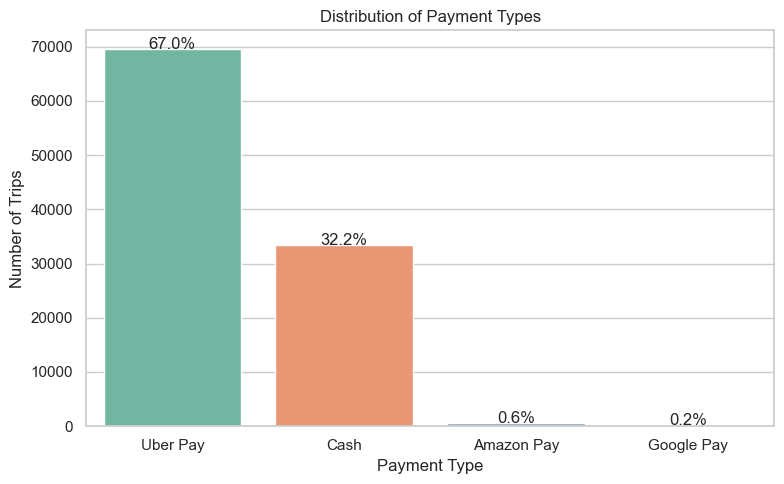

In [24]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Payment_type', data=uber_trip, palette='Set2')

# Calculate percentages
total = len(uber_trip)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.05
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

## 4. Trip Duration vs Trip Distance

In [25]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City,Trip Duration (min)
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens,21.716667
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan,6.883333
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan,13.466667
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn,9.433333
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan,7.000000


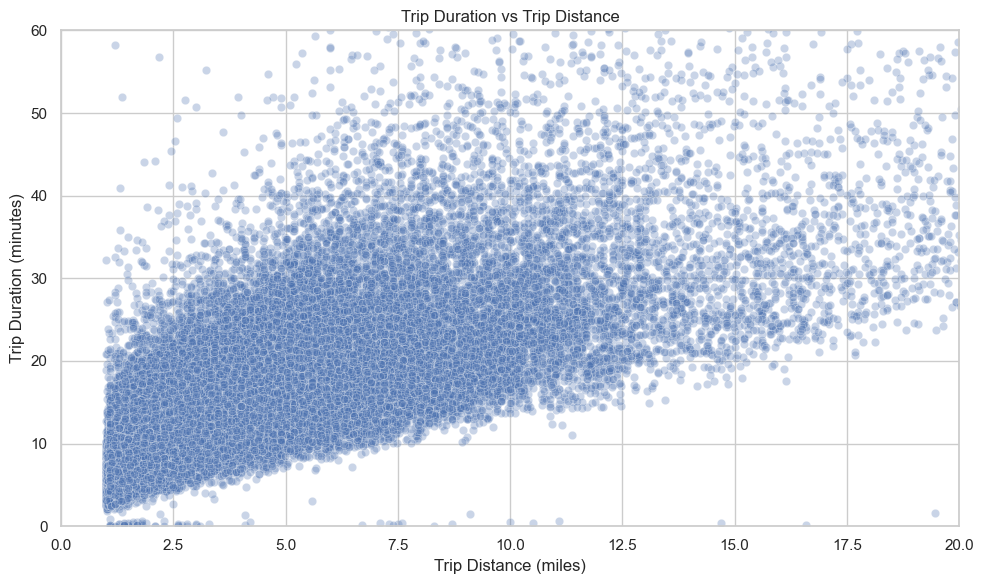

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='Trip Duration (min)', data=uber_trip, alpha=0.3)
plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (minutes)')
plt.xlim(0, 20)
plt.ylim(0, 60)
plt.tight_layout()
plt.show()

In [27]:
uber_trip.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City,Trip Duration (min)
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens,21.716667
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan,6.883333
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan,13.466667
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn,9.433333
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan,7.000000


In [28]:
# uber_trip.to_csv('uber_trip_cleaned.csv', index=False)

In [29]:
# New Cleaned Data
trip_data = pd.read_csv('./uber_trip_cleaned.csv')
trip_data.head()

,Trip ID,Pickup Time,Drop Off Time,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,Surge Fee,Vehicle,Payment_type,Pickup_Time_Hour,Drop_TIme,PU_Location,PU_City,DO_Location,DO_City,Trip Duration (min)
0,1,2024-06-01 00:42:50,2024-06-01 01:04:33,1,5.60,79,226,19.5,2.0,UberX,Uber Pay,00:42:50,01:04:33,East Village,Brooklyn,Sunnyside,Queens,21.716667
1,2,2024-06-01 00:06:29,2024-06-01 00:13:22,1,1.72,142,186,8.0,0.0,Uber Black,Cash,00:06:29,00:13:22,Lincoln Square East,Manhattan,Penn Station/Madison Sq West,Manhattan,6.883333
2,3,2024-06-01 00:08:05,2024-06-01 00:21:33,1,3.41,229,238,13.0,0.0,Uber Black,Cash,00:08:05,00:21:33,Sutton Place/Turtle Bay North,Manhattan,Upper West Side North,Manhattan,13.466667
3,4,2024-06-01 00:28:20,2024-06-01 00:37:46,1,1.81,188,35,9.0,0.0,UberX,Cash,00:28:20,00:37:46,Prospect-Lefferts Gardens,Brooklyn,Brownsville,Brooklyn,9.433333
4,5,2024-06-01 00:38:05,2024-06-01 00:45:05,1,1.89,100,137,8.0,0.0,Uber Black,Cash,00:38:05,00:45:05,Garment District,Queens,Kips Bay,Manhattan,7.000000


In [38]:
for col in trip_data.columns:
    print(col)

Trip ID
Pickup Time
Drop Off Time
Passenger Count
Trip Distance
PULocationID
DOLocationID
Fare Amount
Surge Fee
Vehicle
Payment_type
Pickup_Time_Hour
Drop_TIme
PU_Location
PU_City
DO_Location
DO_City
Trip Duration (min)


In [37]:
trip_data.rename(columns={'passenger_count': 'Passenger Count',},inplace=True)